In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pickle
from scripts.data_visualiser import *
from scripts.data_loader import *
from scripts.data_preprocessor import *
from scripts.temporal_data_preprocessor import *
from scripts.temporal_data_loader import *
from scripts.temporal_visualiser import *
from scripts.temporal_chanel_refinement import *
from Pipeline.pre_processing_pipeline import *
import numpy as np
import preprocessing_config as config

### Train Data

In [3]:
images = load_sentinel_images_temporal(config.sentinel_base_path)

(1000, 1000, 14)
(1000, 1000, 14)
(1000, 1000, 14)
(1000, 1000, 14)
(1000, 1000, 14)
(1000, 1000, 14)
(1000, 1000, 14)
(1000, 1000, 14)
(1000, 1000, 14)
(1000, 1000, 14)
(1000, 1000, 14)


In [4]:
len(images)

11

In [5]:
len(images[0])

20

In [6]:
len(images[1])

20

In [7]:
images[0][0].shape

(1000, 1000, 14)

In [46]:
np.unique(images[0][0][:,:,-2])

array([0.])

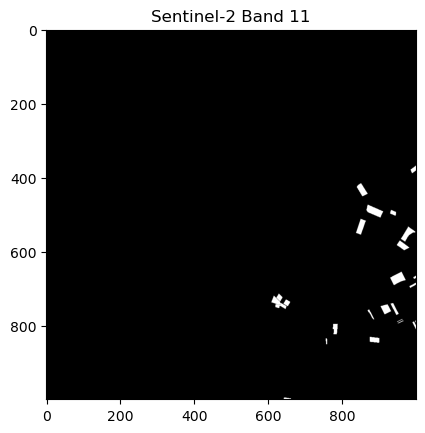

In [9]:
visualise_single_band(images[2][0],11)

In [10]:
fields = extract_fields_temporal(images, config.field_size)

--- Processed 8 regions for scene 0
--- Processed 4 regions for scene 1
--- Processed 23 regions for scene 2
--- Processed 4 regions for scene 3
--- Processed 1 regions for scene 4
--- Processed 19 regions for scene 5
--- Processed 3 regions for scene 6
--- Processed 24 regions for scene 7
--- Processed 4 regions for scene 8
--- Processed 64 regions for scene 9
--- Processed 9 regions for scene 10


In [11]:
len(fields)

163

In [12]:
len(fields[0])

20

In [13]:
#visualise_all_bands(fields[0][30])

In [14]:
fields[1][10].shape

(64, 64, 14)

In [16]:
np.unique(fields[0][10][:,:,-2])

array([0.])

#### Analysing Image Availability - 163 fields

In [17]:
refined_fields = refine_temporal_stack_raw(fields, config.temporal_stack_size, config.temporal_points)

Patch discarded: Missing images for some date ranges.
Flag array was:  [1. 0. 0. 0. 1. 0. 0.]
Patch discarded: Missing images for some date ranges.
Flag array was:  [1. 1. 0. 0. 1. 1. 0.]
Patch discarded: Missing images for some date ranges.
Flag array was:  [1. 1. 1. 0. 1. 1. 0.]
Patch discarded: Missing images for some date ranges.
Flag array was:  [1. 1. 1. 0. 1. 1. 1.]
Patch discarded: Missing images for some date ranges.
Flag array was:  [1. 1. 1. 0. 1. 1. 1.]
Patch discarded: Missing images for some date ranges.
Flag array was:  [1. 1. 1. 0. 1. 1. 1.]
Patch discarded: Missing images for some date ranges.
Flag array was:  [1. 1. 1. 0. 1. 1. 1.]
Patch discarded: Missing images for some date ranges.
Flag array was:  [1. 1. 1. 0. 1. 1. 1.]
Patch discarded: Missing images for some date ranges.
Flag array was:  [1. 1. 1. 0. 1. 1. 0.]
Patch discarded: Missing images for some date ranges.
Flag array was:  [1. 1. 1. 0. 1. 1. 1.]
Patch discarded: Missing images for some date ranges.
Flag a

In [18]:
len(refined_fields)

95

In [19]:
len(refined_fields[0])

7

In [20]:
refined_fields[0][0].shape

(64, 64, 14)

In [42]:
np.unique(refined_fields[1][0][:,:,-2])

array([0.])

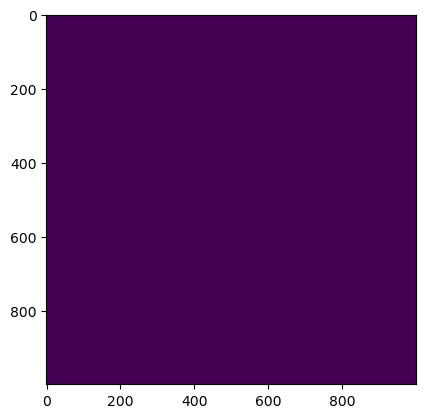

In [49]:
fn_mask = load_single_image('/Users/bhumikasadbhave007/Documents/THWS/Semester-4/MASTER-THESIS/Temporal-Data/train/2019_data_rest/32UMV_6_3/field_number.pkl')
plt.imshow(fn_mask)

In [50]:
np.unique(fn_mask)

array([0], dtype=int32)

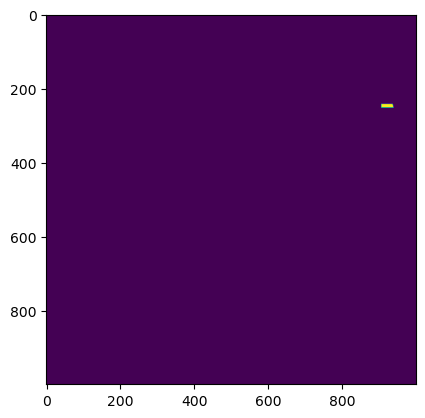

In [51]:
fn_mask = load_single_image('/Users/bhumikasadbhave007/Documents/THWS/Semester-4/MASTER-THESIS/Temporal-Data/test/SBR_2019_data/32UMU_8_2/field_number.pkl')
plt.imshow(fn_mask)

In [52]:
np.unique(fn_mask)

array([      0, 1230818], dtype=int32)

### Test Data - with labels

In [3]:
images = load_sentinel_images_temporal('/Users/bhumikasadbhave007/Documents/THWS/Semester-4/MASTER-THESIS/Temporal-Data/train/first-10')

(1000, 1000, 13)
(1000, 1000, 13)
(1000, 1000, 13)
(1000, 1000, 13)
(1000, 1000, 13)
(1000, 1000, 13)
(1000, 1000, 13)
(1000, 1000, 13)
(1000, 1000, 13)
(1000, 1000, 13)
(1000, 1000, 13)
(1000, 1000, 13)
(1000, 1000, 13)
(1000, 1000, 13)
(1000, 1000, 13)


##### Rotation Error

In [21]:
sm = load_single_image('/Users/bhumikasadbhave007/Documents/THWS/Semester-4/MASTER-THESIS/Temporal-Data/test/first-11/32UMU_8_2/temporal_data/2019_06_26_all_bands_scl.pkl')
sm.shape

(11, 1000, 1000)

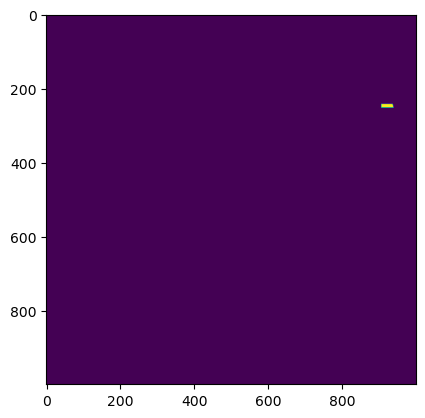

In [22]:
mask = load_single_image('/Users/bhumikasadbhave007/Documents/THWS/Semester-4/MASTER-THESIS/Temporal-Data/test/first-11/32UMU_8_2/fieldmask.pkl')
plt.imshow(mask)

In [23]:
sm1 = np.transpose(sm, (2, 1, 0))
sm1.shape

(1000, 1000, 11)

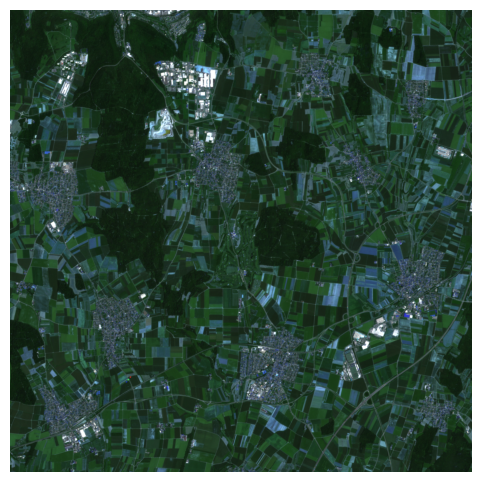

In [24]:
sm1 = (sm1 - np.min(sm1)) / (np.max(sm1) - np.min(sm1))
brightness_factor = 5  # >1 to increase brightness, <1 to decrease
sm1 = np.clip(sm1 * brightness_factor, 0, 1)
plt.figure(figsize=(8, 6))
plt.imshow(sm1[:,:,:3])  # Use color map to visualize mCAI
plt.axis('off')  # Hide axis
plt.show()

In [84]:
len(images)

4

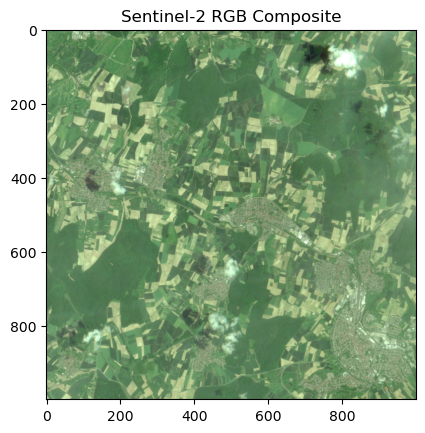

In [4]:
visualise_rgb(images[3][7])

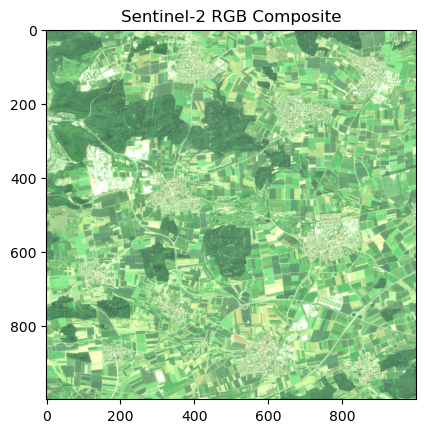

In [25]:
######## rotate-flip #########

img2 = sm1#images[3][7]
sm_fixed = np.flip(img2, axis=1)  # Flip along the vertical axis.
sm_rotated = np.rot90(sm_fixed, k=1, axes=(0, 1))

visualise_rgb(sm_rotated)

##### Continued

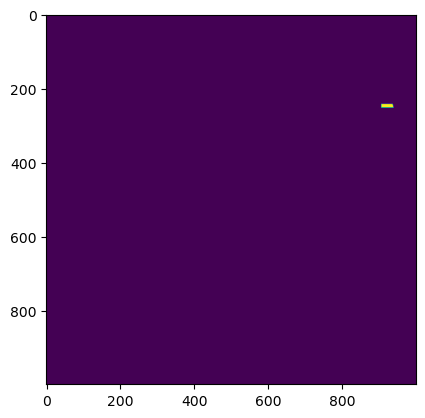

In [5]:
plt.imshow(images[2][7][:,:,-1])

In [4]:
np.unique(images[3][7][:,:,-2])

array([      0., 1169476., 1175687., 1175688., 1179773., 1179778.,
       1179779., 1179782., 1179786., 1179788., 1179981., 1179984.,
       1179986., 1179988., 1182594., 1182595., 1182879., 1183115.,
       1186768., 1186770., 1215964., 1218972., 1218978., 1219464.,
       1219466., 1219467., 1219532., 1220108., 1220109., 1220114.,
       1220115., 1222654., 1222659., 1223166., 1223167., 1223168.,
       1223509., 1223871., 1223876., 1223878., 1223882., 1223885.,
       1223934., 1223940., 1225179., 1225181., 1225183., 1225185.,
       1226057., 1226329., 1227292., 1227377., 1227380., 1227381.,
       1227384., 1227458., 1227922., 1227923., 1227986., 1227990.,
       1228325., 1228327., 1228328.])

In [4]:
masked_images = mask_images_temporal(images)

In [5]:
fields = extract_fields_temporal(masked_images, config.field_size)

--- Processed 65 regions for scene 0
--- Processed 5 regions for scene 1
--- Processed 9 regions for scene 2
--- Processed 45 regions for scene 3
--- Processed 20 regions for scene 4
--- Processed 4 regions for scene 5
--- Processed 1 regions for scene 6
--- Processed 1 regions for scene 7
--- Processed 26 regions for scene 8
--- Processed 5 regions for scene 9
--- Processed 16 regions for scene 10
--- Processed 22 regions for scene 11
--- Processed 20 regions for scene 12
--- Processed 6 regions for scene 13
--- Processed 11 regions for scene 14


In [6]:
len(fields)

256

In [7]:
refined_fields = refine_temporal_stack_raw(fields, config.temporal_stack_size, config.temporal_points)

Patch discarded: Missing images for some date ranges.
Flag array was:  [1. 1. 1. 0. 1. 1. 1.]
Patch discarded: Missing images for some date ranges.
Flag array was:  [1. 1. 1. 0. 1. 1. 1.]
Patch discarded: Missing images for some date ranges.
Flag array was:  [1. 1. 1. 0. 1. 1. 1.]
Patch discarded: Missing images for some date ranges.
Flag array was:  [1. 1. 1. 0. 1. 1. 1.]
Patch discarded: Missing images for some date ranges.
Flag array was:  [1. 1. 1. 0. 1. 1. 1.]
Patch discarded: Missing images for some date ranges.
Flag array was:  [1. 1. 1. 0. 1. 1. 1.]
Patch discarded: Missing images for some date ranges.
Flag array was:  [1. 1. 1. 0. 1. 1. 1.]
Patch discarded: Missing images for some date ranges.
Flag array was:  [1. 1. 1. 0. 1. 1. 1.]
Patch discarded: Missing images for some date ranges.
Flag array was:  [1. 1. 1. 0. 1. 1. 1.]
Patch discarded: Missing images for some date ranges.
Flag array was:  [1. 1. 1. 0. 1. 1. 1.]
Patch discarded: Missing images for some date ranges.
Flag a

In [8]:
len(refined_fields)

75

Saving Images

In [9]:
success = save_field_images_temporal(config.base_directory_temporal_train, refined_fields)
success

True

In [10]:
temporal_images_train = load_field_images_temporal(config.base_directory_temporal_train)
len(temporal_images_train)

2425

In [11]:
folder_path = config.base_directory_temporal_test
unique_ids = []
count = 0

for folder_name in os.listdir(folder_path):

    ids = folder_name.split("_")
    count += len(ids)

count

66

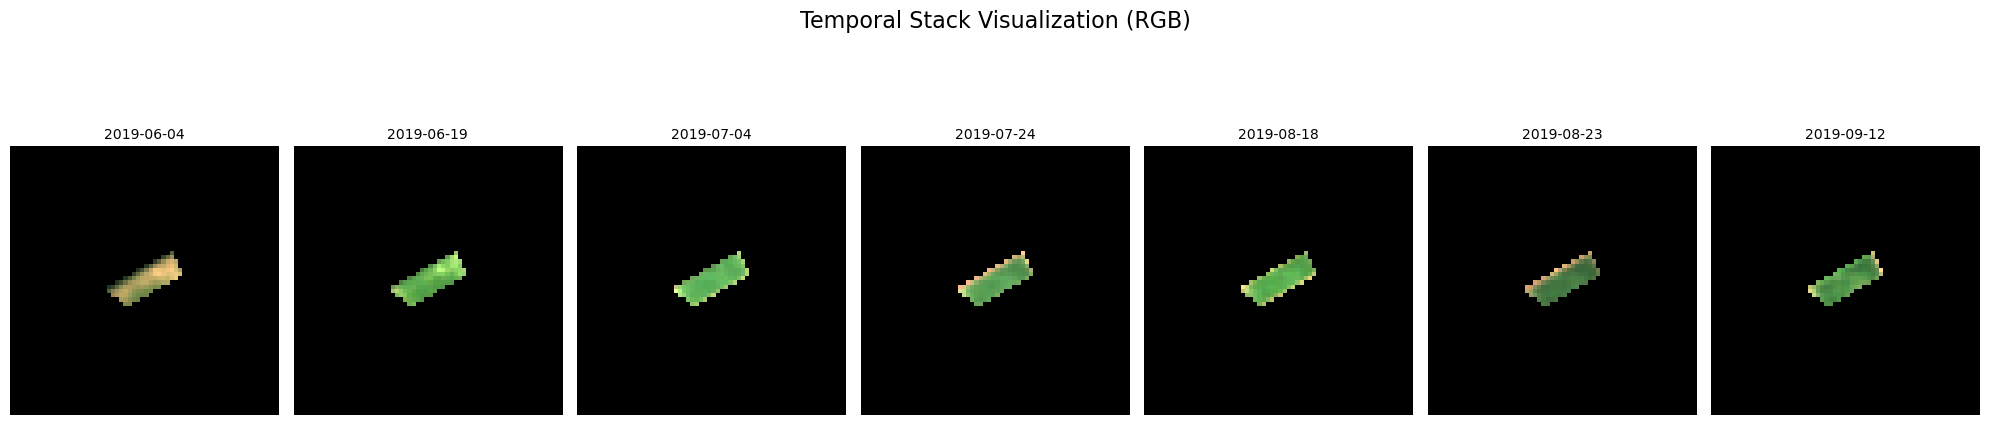

In [13]:
visualize_temporal_stack_rgb(temporal_images_train[2403])